In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/TestbedMonJun14Flows.csv'
df = pd.read_csv(file_path)
print("Original dataset shape:", df.shape)

# Select relevant features
numeric_features = ['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets',
                    'totalSourcePackets', 'sourcePort', 'destinationPort']
categorical_features = ['appName', 'direction', 'protocolName']

# Keep only selected features and the label
selected_features = numeric_features + categorical_features + ['Label']
df = df[selected_features]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Separate features and label
X = df_encoded.drop('Label', axis=1)
y = df_encoded['Label']

print("Dataset shape after preprocessing:", X.shape)

# Standardize numerical features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

print("Standardized numerical features:")
print("Mean:", X[numeric_features].mean())
print("Std:", X[numeric_features].std())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape before SMOTE:", X_train.shape)
print("Original class distribution:")
print(Counter(y_train))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Training set shape after SMOTE:", X_train_resampled.shape)
print("Resampled class distribution:")
print(Counter(y_train_resampled))


# Keep the test set unchanged
print("Test set shape:", X_test.shape)

# Re-scale all features after SMOTE
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Scaled training set shape:", X_train_resampled_scaled.shape)
print("Scaled test set shape:", X_test_scaled.shape)

# Now X_train_resampled_scaled and X_test_scaled can be used for our model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original dataset shape: (171380, 21)
Dataset shape after preprocessing: (171380, 110)
Standardized numerical features:
Mean: totalSourceBytes          -5.389810e-19
totalDestinationBytes      3.648486e-18
totalDestinationPackets   -1.368182e-18
totalSourcePackets        -7.048212e-19
sourcePort                -6.898956e-17
destinationPort            0.000000e+00
dtype: float64
Std: totalSourceBytes           1.000003
totalDestinationBytes      1.000003
totalDestinationPackets    1.000003
totalSourcePackets         1.000003
sourcePort                 1.000003
destinationPort            1.000003
dtype: float64
Training set shape before SMOTE: (137104, 110)
Original class distribution:
Counter({'Normal': 134112, 'Attack': 2992})
Training set shape after SMOTE: (268224, 110)
Resampled class distribution:
Counter({'Attack': 134112, 'Normal': 134112})
Test set shap


Performing K-Means Clustering:


Calculating scores:  11%|█         | 1/9 [00:08<01:04,  8.05s/it]

For n_clusters = 2, the average silhouette score is : 0.24434166758343462


Calculating scores:  22%|██▏       | 2/9 [00:15<00:55,  7.95s/it]

For n_clusters = 3, the average silhouette score is : 0.2613634192835685


Calculating scores:  33%|███▎      | 3/9 [00:28<01:00, 10.06s/it]

For n_clusters = 4, the average silhouette score is : 0.2478982171906575


Calculating scores:  44%|████▍     | 4/9 [00:39<00:51, 10.32s/it]

For n_clusters = 5, the average silhouette score is : 0.06556648144478078


Calculating scores:  56%|█████▌    | 5/9 [00:49<00:41, 10.33s/it]

For n_clusters = 6, the average silhouette score is : 0.05251566957803987


Calculating scores:  67%|██████▋   | 6/9 [01:04<00:35, 11.85s/it]

For n_clusters = 7, the average silhouette score is : 0.2314418956938175


Calculating scores:  78%|███████▊  | 7/9 [01:18<00:25, 12.67s/it]

For n_clusters = 8, the average silhouette score is : 0.2886889635098577


Calculating scores:  89%|████████▉ | 8/9 [01:33<00:13, 13.41s/it]

For n_clusters = 9, the average silhouette score is : 0.10988421696998027


Calculating scores: 100%|██████████| 9/9 [01:52<00:00, 12.47s/it]

For n_clusters = 10, the average silhouette score is : 0.2980548417298063


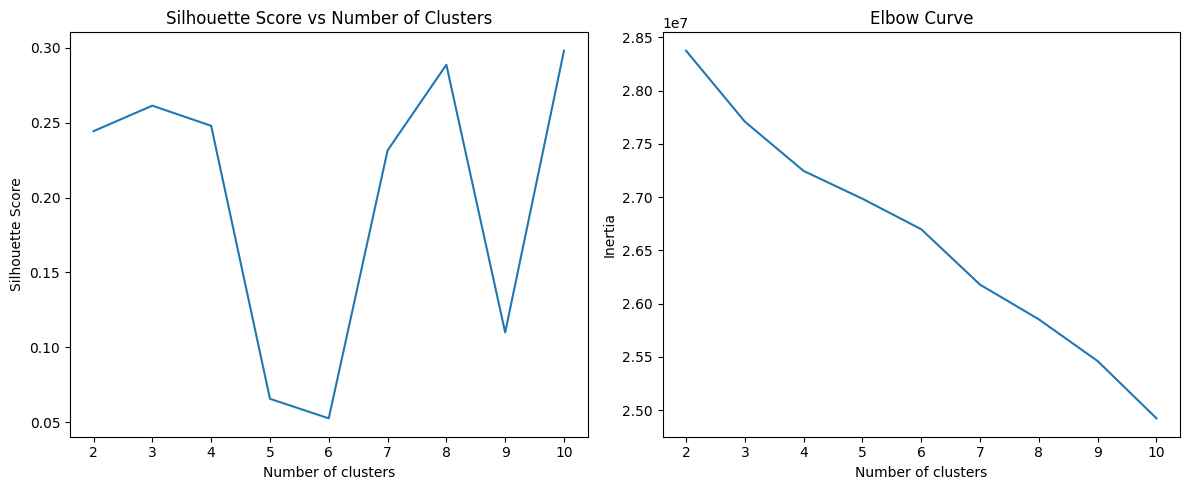


Optimal number of clusters based on silhouette score: 10


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import matplotlib.pyplot as plt

print("\nPerforming K-Means Clustering:")
max_clusters = 10
silhouette_scores = []
inertias = []

for n_clusters in tqdm(range(2, max_clusters + 1), desc="Calculating scores"):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_resampled_scaled)

    # Check if we have more than one unique cluster
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X_train_resampled_scaled, cluster_labels, sample_size=10000)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Invalid score

    inertias.append(kmeans.inertia_)

    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_scores[-1]}")

# Plot silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

# Plot elbow curve
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

plt.tight_layout()
plt.show()

# Choose the number of clusters
valid_scores = [score for score in silhouette_scores if score != -1]
if valid_scores:
    optimal_clusters = silhouette_scores.index(max(valid_scores)) + 2
    print(f"\nOptimal number of clusters based on silhouette score: {optimal_clusters}")
else:
    optimal_clusters = 2  # Default to 2 if no valid scores
    print("\nNo valid silhouette scores. Defaulting to 2 clusters.")

# Perform final K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_resampled_scaled)

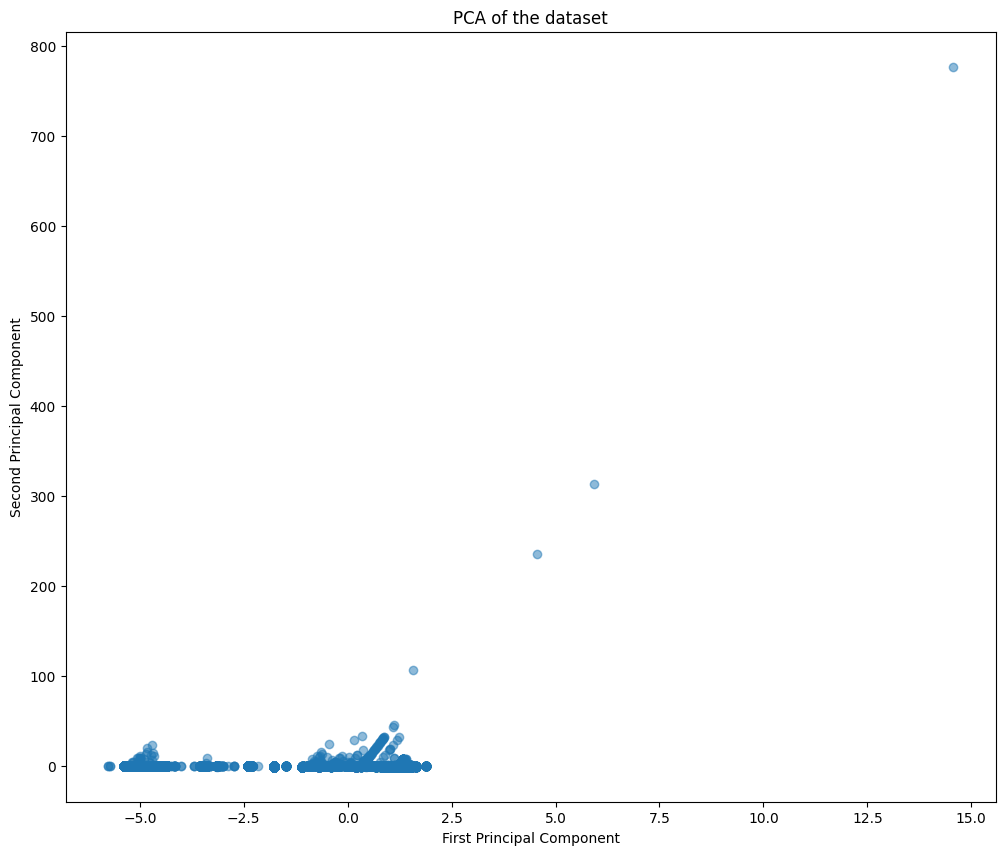

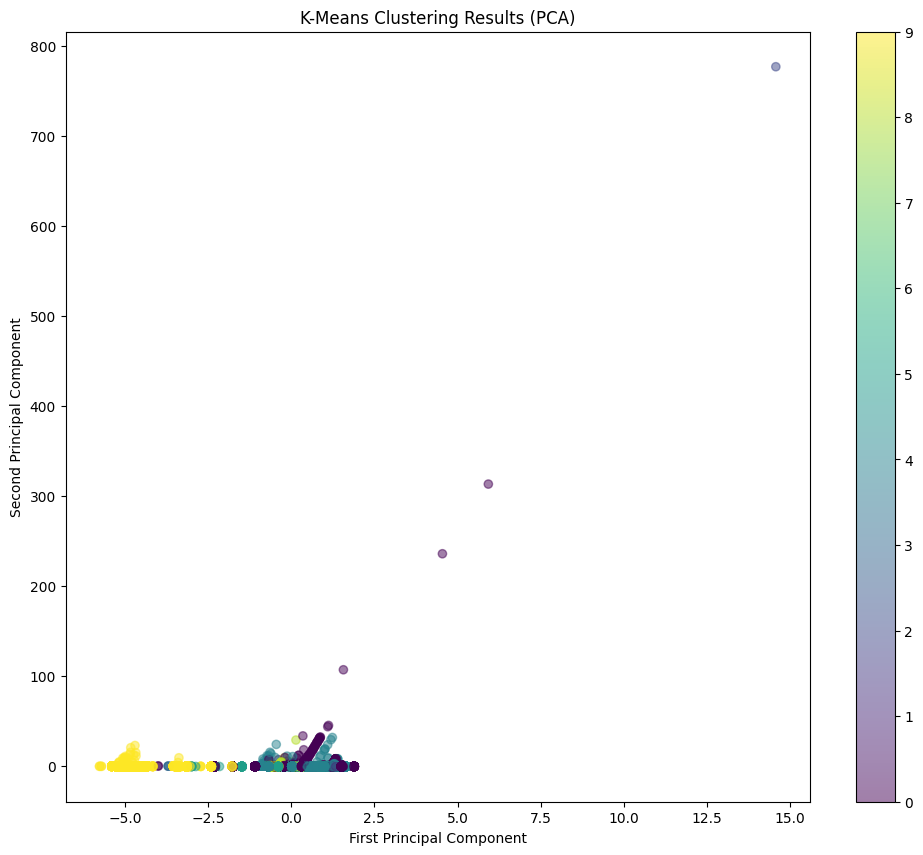

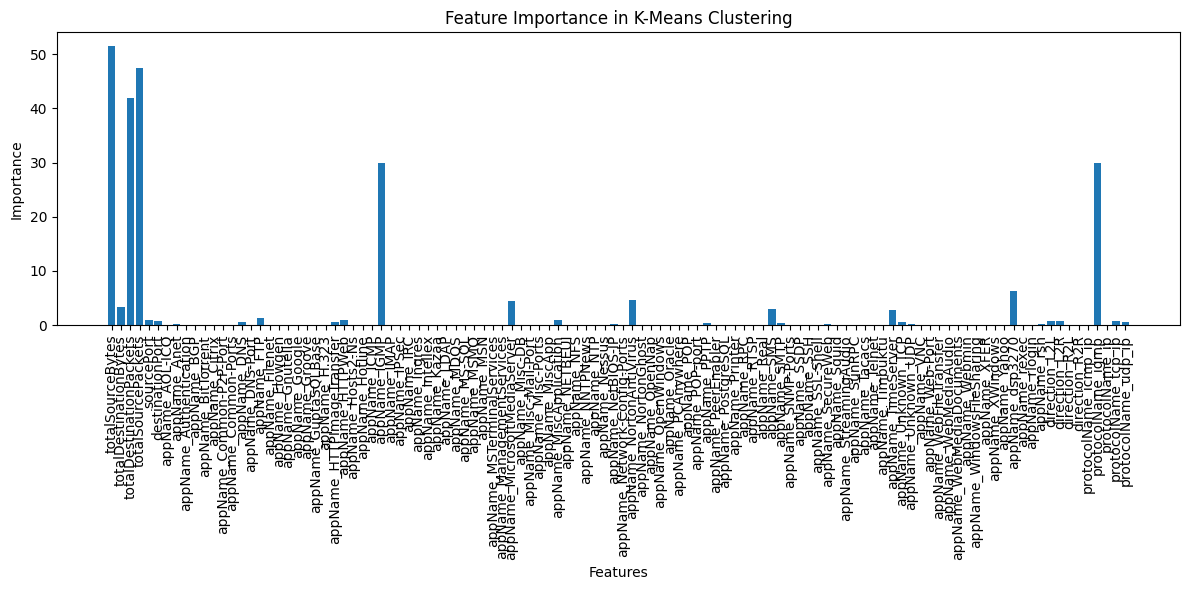

Top 10 most important features:
totalSourceBytes: 51.449226890397675
totalSourcePackets: 47.35221864887031
totalDestinationPackets: 41.92672820212233
appName_IGMP: 29.90401326009093
protocolName_igmp: 29.90401326009093
appName_dsp3270: 6.340633660546997
appName_NortonAntiVirus: 4.632278028066765
appName_MicrosoftMediaServer: 4.443963106662148
totalDestinationBytes: 3.2673301424570935
appName_SMS: 2.948625147230861


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming X_train_resampled_scaled is your scaled, resampled training data

# 1. PCA and Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_resampled_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA of the dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# 2. Visualize Cluster Distributions (using K-Means with 8 clusters as previously determined by the optimal number of clusters above)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_resampled_scaled)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

# 3. Analyze Feature Importance
feature_importance = np.abs(kmeans.cluster_centers_).mean(axis=0)
feature_names = X_train_resampled.columns

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance in K-Means Clustering')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(feature_importance)), feature_names, rotation=90)
plt.tight_layout()
plt.show()

# Print top 10 most important features
top_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 most important features:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


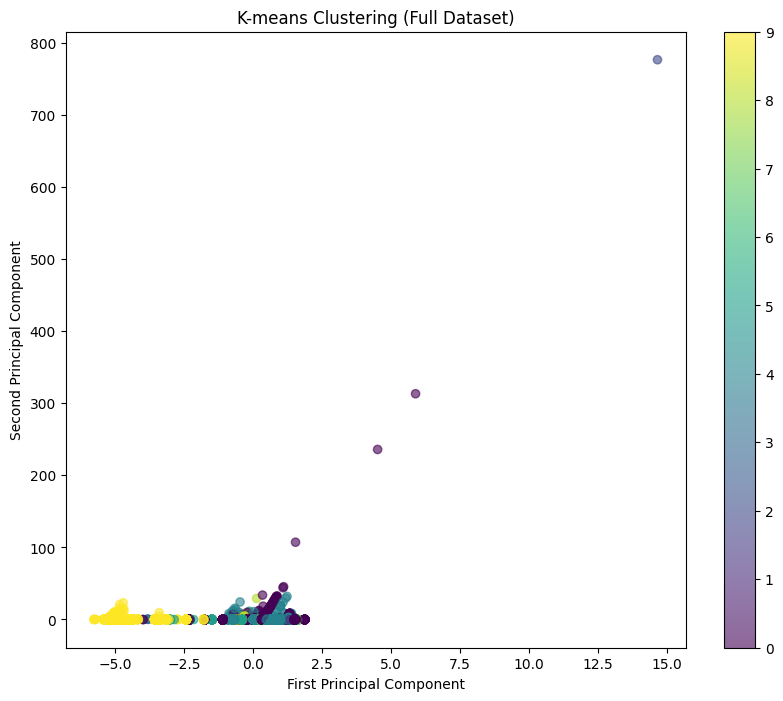

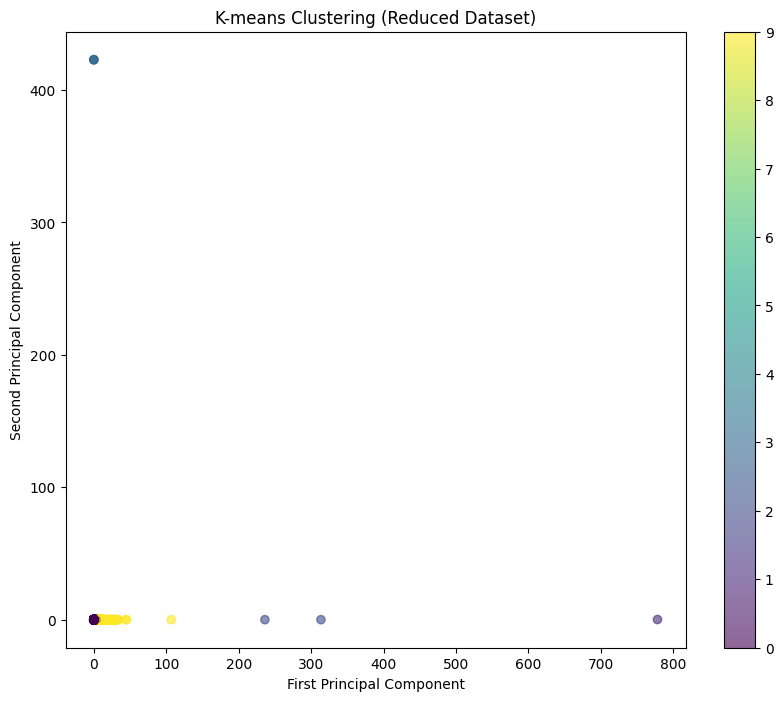

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# X_train_resampled_scaled set as our current dataset

# 1. Feature Selection
top_features = ['totalSourceBytes', 'totalSourcePackets', 'totalDestinationPackets',
                'appName_IGMP', 'protocolName_igmp', 'appName_dsp3270',
                'appName_NortonAntiVirus', 'appName_MicrosoftMediaServer',
                'totalDestinationBytes', 'appName_SMS']

X_reduced = X_train_resampled_scaled[:, [X_train_resampled.columns.get_loc(col) for col in top_features]]

# 2. K-means Clustering
n_clusters = 10 # Adjust based on domain knowledge or previous analysis
kmeans_full = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_reduced = KMeans(n_clusters=n_clusters, random_state=42)

labels_full = kmeans_full.fit_predict(X_train_resampled_scaled)
labels_reduced = kmeans_reduced.fit_predict(X_reduced)

# 3. Visualization Function
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

plot_clusters(X_train_resampled_scaled, labels_full, 'K-means Clustering (Full Dataset)')
plot_clusters(X_reduced, labels_reduced, 'K-means Clustering (Reduced Dataset)')


In [ ]:
#Prepare the data for the deep learning model (using cluster labels as features)
X_train_cluster_labels = labels_full.reshape(-1, 1)  # Use cluster labels from full dataset

# Convert string labels to numerical labels (binary classification)
y_train_resampled_numeric = y_train_resampled.map({'Normal': 0, 'Attack': 1}) #label mapping
y_val_cluster_numeric = y_val_cluster.map({'Normal': 0, 'Attack': 1})

# Split the data into training and validation sets (using only cluster labels)
X_train_cluster, X_val_cluster, y_train_cluster, y_val_cluster = train_test_split(
    X_train_cluster_labels, y_train_resampled_numeric, test_size=0.2, random_state=42  # Use numerical labels
)

# Build and train the deep learning model on cluster representations
def build_model_cluster():
    model = Sequential([
        Dense(64, activation='relu', input_dim=1),  #  cluster label as the input
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model on cluster representations
model_cluster = build_model_cluster()
history_cluster = model_cluster.fit(
    X_train_cluster, y_train_cluster, epochs=20, batch_size=32,
    validation_data=(X_val_cluster, y_val_cluster_numeric)  # Use numerical labels
)


# Evaluate the model performance
loss_cluster, accuracy_cluster = model_cluster.evaluate(X_val_cluster, y_val_cluster)

print(f"Cluster-Based Model - Loss: {loss_cluster}, Accuracy: {accuracy_cluster}")


Epoch 1/20
6706/6706 [==============================] - 30s 4ms/step - loss: 0.5826 - accuracy: 0.6425 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
6706/6706 [==============================] - 21s 3ms/step - loss: 0.5817 - accuracy: 0.6430 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
6706/6706 [==============================] - 32s 5ms/step - loss: 0.5816 - accuracy: 0.6430 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
6706/6706 [==============================] - 19s 3ms/step - loss: 0.5816 - accuracy: 0.6430 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
6706/6706 [==============================] - 20s 3ms/step - loss: 0.5817 - accuracy: 0.6430 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
6706/6706 [==============================] - 18s 3ms/step - loss: 0.5816 - accuracy: 0.6430 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
6706/6706 [==============================] - 24s 4ms/step - loss: 0.5816 - accuracy: 0.6430 - val_loss: nan - val

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Predict on Original Training Data
# Predict cluster labels for original training data
X_train_clusters_predicted = kmeans_full.predict(X_train)
X_train_clusters_predicted = X_train_clusters_predicted.reshape(-1, 1)  # Reshape for model input

# Predict probabilities using the cluster-based model
y_train_pred_proba = model_cluster.predict(X_train_clusters_predicted)

# 2. Convert Predictions to Classes
y_train_pred = (y_train_pred_proba > 0.5).astype(int)  #Set threshold

# 3. Evaluate Performance
# y_train contains original labels as 'Normal' and 'Attack'
y_train_numeric = y_train.map({'Normal': 0, 'Attack': 1})

accuracy = accuracy_score(y_train_numeric, y_train_pred)
precision = precision_score(y_train_numeric, y_train_pred)
recall = recall_score(y_train_numeric, y_train_pred)
f1 = f1_score(y_train_numeric, y_train_pred)
conf_matrix = confusion_matrix(y_train_numeric, y_train_pred)

print("Performance on Original Training Data:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


4285/4285 [==============================] - 13s 3ms/step
Performance on Original Training Data:
Accuracy: 0.2008110631345548
Precision: 0.017475552336110103
Recall: 0.6450534759358288
F1-Score: 0.03402919810988081
Confusion Matrix:
[[ 25602 108510]
 [  1062   1930]]


In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Prepare Data for XGBoost
# X_train and y_train from the first code cell

# 2. Create and Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic',  # For binary classification
                              eval_metric='logloss',  # Use logloss as evaluation metric
                              scale_pos_weight=(len(y_train[y_train == 'Normal']) /
                                               len(y_train[y_train == 'Attack'])),  # Handle class imbalance
                              random_state=42)

xgb_model.fit(X_train, y_train.map({'Normal': 0, 'Attack': 1}))  # Fit the model

# 3. Predict on Original Training Data
y_train_pred = xgb_model.predict(X_train)

# 4. Evaluate Performance
accuracy = accuracy_score(y_train.map({'Normal': 0, 'Attack': 1}), y_train_pred)
precision = precision_score(y_train.map({'Normal': 0, 'Attack': 1}), y_train_pred)
recall = recall_score(y_train.map({'Normal': 0, 'Attack': 1}), y_train_pred)
f1 = f1_score(y_train.map({'Normal': 0, 'Attack': 1}), y_train_pred)
conf_matrix = confusion_matrix(y_train.map({'Normal': 0, 'Attack': 1}), y_train_pred)

print("XGBoost Performance on Original Training Data:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

XGBoost Performance on Original Training Data:
Accuracy: 0.9992925078772319
Precision: 0.9685982518614439
Recall: 1.0
F1-Score: 0.9840486762045717
Confusion Matrix:
[[134015     97]
 [     0   2992]]


Performing Anomaly Detection with Isolation Forest:
Contamination 0.1: 26822 outliers detected
Contamination 0.2: 53644 outliers detected
Contamination 0.3: 80467 outliers detected

Performing K-Means Clustering:


Calculating silhouette scores:  11%|█         | 1/9 [00:09<01:12,  9.07s/it]

For n_clusters = 2, the average silhouette score is : 0.21885079580509517


Calculating silhouette scores:  22%|██▏       | 2/9 [00:20<01:13, 10.45s/it]

For n_clusters = 3, the average silhouette score is : 0.23222739500287384


Calculating silhouette scores:  33%|███▎      | 3/9 [00:34<01:12, 12.17s/it]

For n_clusters = 4, the average silhouette score is : 0.2301748146758208


Calculating silhouette scores:  44%|████▍     | 4/9 [00:46<00:59, 11.90s/it]

For n_clusters = 5, the average silhouette score is : 0.048549015790792016


Calculating silhouette scores:  56%|█████▌    | 5/9 [00:56<00:45, 11.40s/it]

For n_clusters = 6, the average silhouette score is : 0.07667590164286464


Calculating silhouette scores:  67%|██████▋   | 6/9 [01:10<00:36, 12.18s/it]

For n_clusters = 7, the average silhouette score is : 0.2305316616355517


Calculating silhouette scores:  78%|███████▊  | 7/9 [01:24<00:25, 12.75s/it]

For n_clusters = 8, the average silhouette score is : 0.29680441193461055


Calculating silhouette scores:  89%|████████▉ | 8/9 [01:39<00:13, 13.45s/it]

For n_clusters = 9, the average silhouette score is : 0.1386772474733361


Calculating silhouette scores: 100%|██████████| 9/9 [01:58<00:00, 13.12s/it]

For n_clusters = 10, the average silhouette score is : 0.2868013557972294


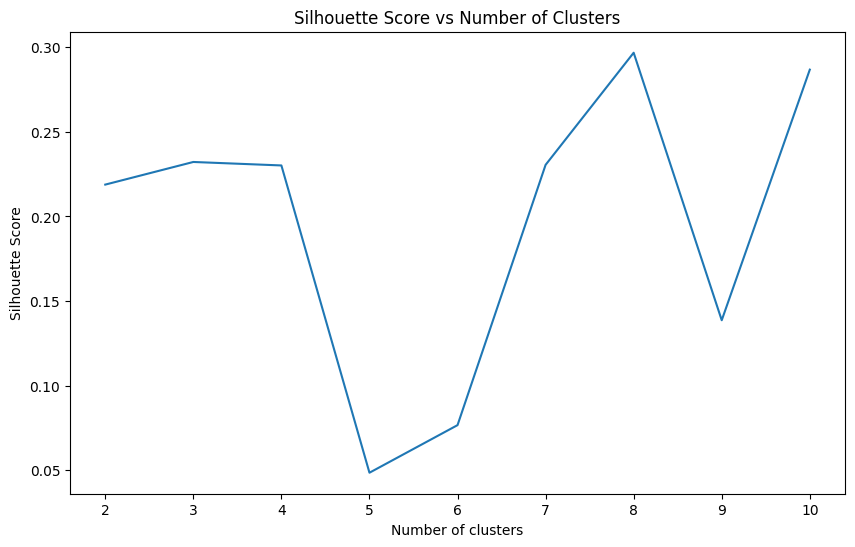


Optimal number of clusters: 8

Performing Self-Organizing Map (SOM) analysis:


Training SOM: 100%|██████████| 10000/10000 [00:05<00:00, 1849.98it/s]


Calculating SOM node positions...


Processing data points: 100%|██████████| 268224/268224 [00:53<00:00, 4992.82it/s]


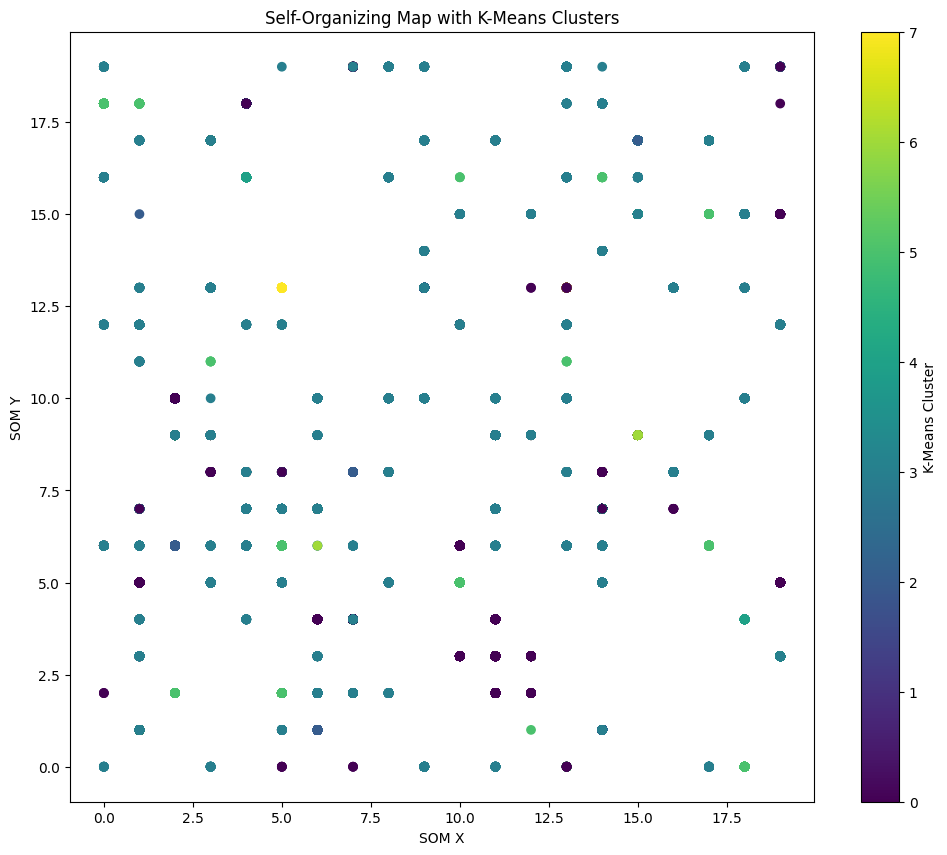

Anomaly detection, clustering, and SOM analysis completed.

Analyzing feature importance for each cluster:

Cluster 0:
totalSourceBytes: Mean = -0.00, Std = 0.15
totalDestinationBytes: Mean = 0.01, Std = 1.36
totalDestinationPackets: Mean = 0.01, Std = 0.79
totalSourcePackets: Mean = 0.00, Std = 0.53
sourcePort: Mean = -0.58, Std = 0.60
destinationPort: Mean = -0.26, Std = 0.06
appName_AOL-ICQ: Mean = -0.03, Std = 0.00
appName_Anet: Mean = -0.02, Std = 0.00
appName_Authentication: Mean = -0.05, Std = 0.00
appName_BGP: Mean = -0.02, Std = 0.00
appName_BitTorrent: Mean = -0.03, Std = 0.46
appName_Citrix: Mean = -0.02, Std = 0.00
appName_Common-P2P-Port: Mean = -0.02, Std = 0.00
appName_Common-Ports: Mean = -0.00, Std = 0.00
appName_DNS: Mean = -0.35, Std = 0.00
appName_DNS-Port: Mean = -0.01, Std = 0.00
appName_FTP: Mean = -0.08, Std = 0.13
appName_Filenet: Mean = -0.04, Std = 0.00
appName_Flowgen: Mean = -0.09, Std = 0.00
appName_Gnutella: Mean = -0.02, Std = 0.00
appName_Google: Mean =

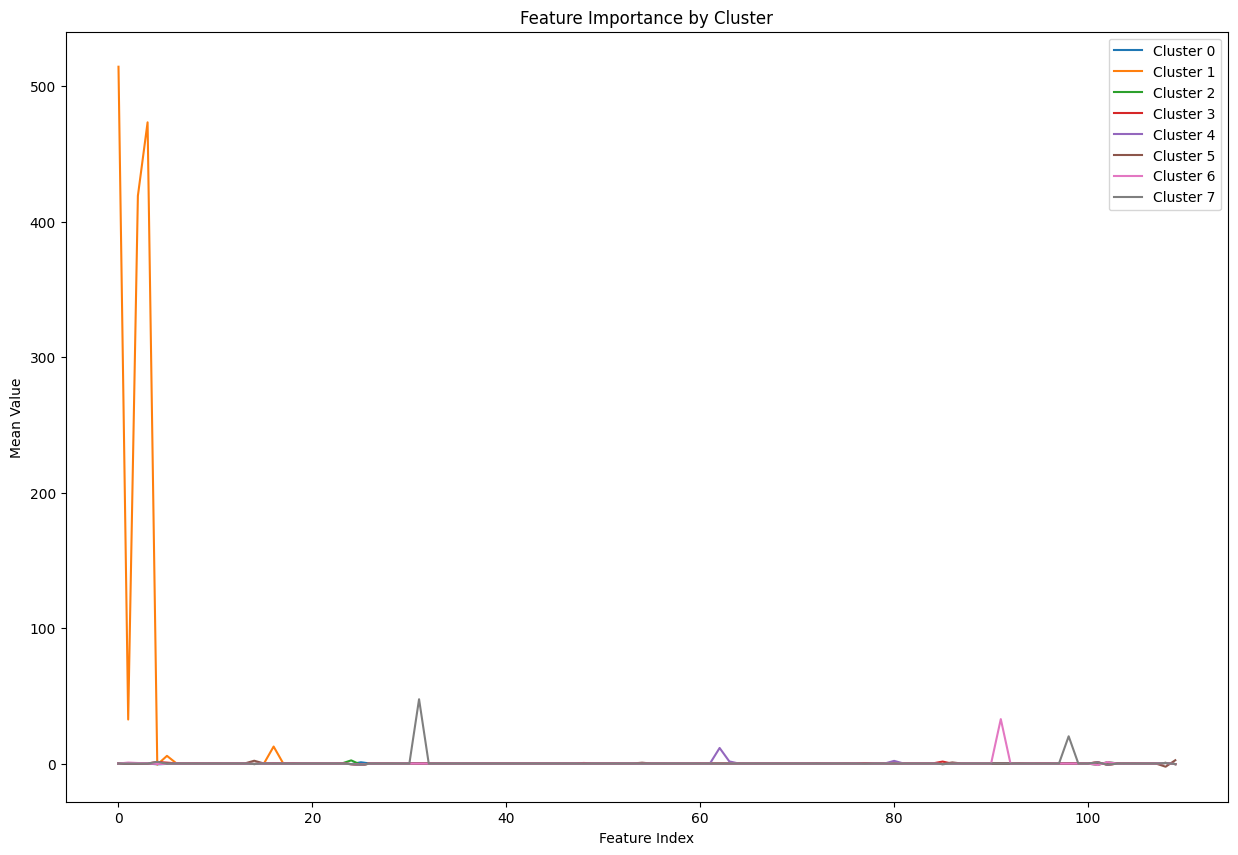

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
!pip install minisom tqdm
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# X_train_resampled_scaled and y_train_resampled from the previous step

# Apply Anomaly Detection
# 1. Isolation Forest for Anomaly Detection
print("Performing Anomaly Detection with Isolation Forest:")
contamination_levels = [0.1, 0.2, 0.3]
for contamination in contamination_levels:
    clf = IsolationForest(contamination=contamination, random_state=42, n_jobs=-1)
    y_pred = clf.fit_predict(X_train_resampled_scaled)
    n_outliers = np.sum(y_pred == -1)
    print(f"Contamination {contamination}: {n_outliers} outliers detected")

# 2. K-Means Clustering
print("\nPerforming K-Means Clustering:")
max_clusters = 10
silhouette_scores = []
for n_clusters in tqdm(range(2, max_clusters + 1), desc="Calculating silhouette scores"):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_resampled_scaled)
    silhouette_avg = silhouette_score(X_train_resampled_scaled, cluster_labels, sample_size=10000)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nOptimal number of clusters: {optimal_clusters}")

# Perform final K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_resampled_scaled)

# 3. Self-Organizing Map (SOM)
print("\nPerforming Self-Organizing Map (SOM) analysis:")
som_dim = (20, 20)  # Larger SOM grid for larger dataset
input_dim = X_train_resampled_scaled.shape[1]  # Number of features

# Initialize and train SOM
som = MiniSom(som_dim[0], som_dim[1], input_dim, sigma=0.3, learning_rate=0.5)

# Train SOM with progress updates
num_iterations = 10000  # Increased iterations for better convergence
for i in tqdm(range(num_iterations), desc="Training SOM"):
    som.train_random(X_train_resampled_scaled, 1)  # Train one sample at a time

# Get SOM node positions for each data point
print("Calculating SOM node positions...")
som_nodes = np.array([som.winner(x) for x in tqdm(X_train_resampled_scaled, desc="Processing data points")])

# Visualize SOM
plt.figure(figsize=(12, 10))
plt.title('Self-Organizing Map with K-Means Clusters')
scatter = plt.scatter(som_nodes[:, 0], som_nodes[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter, label='K-Means Cluster')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.show()

print("Anomaly detection, clustering, and SOM analysis completed.")

# Additional analysis: Feature importance for each cluster
print("\nAnalyzing feature importance for each cluster:")
for cluster in range(optimal_clusters):
    cluster_data = X_train_resampled_scaled[cluster_labels == cluster]
    cluster_mean = cluster_data.mean(axis=0)
    cluster_std = cluster_data.std(axis=0)

    print(f"\nCluster {cluster}:")
    for feature, mean, std in zip(X.columns, cluster_mean, cluster_std):
        print(f"{feature}: Mean = {mean:.2f}, Std = {std:.2f}")

# Visualize feature importance
plt.figure(figsize=(15, 10))
for cluster in range(optimal_clusters):
    cluster_data = X_train_resampled_scaled[cluster_labels == cluster]
    cluster_mean = cluster_data.mean(axis=0)
    plt.plot(range(len(cluster_mean)), cluster_mean, label=f'Cluster {cluster}')

plt.title('Feature Importance by Cluster')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.legend()
plt.show()


Performing K-Means Clustering:


Calculating silhouette scores:  11%|█         | 1/9 [00:06<00:48,  6.12s/it]

For n_clusters = 2, the average silhouette score is : 0.24195062201626683


Calculating silhouette scores:  22%|██▏       | 2/9 [00:16<01:02,  8.88s/it]

For n_clusters = 3, the average silhouette score is : 0.2356596084717446


Calculating silhouette scores:  33%|███▎      | 3/9 [00:30<01:05, 10.84s/it]

For n_clusters = 4, the average silhouette score is : 0.26604750484730555


Calculating silhouette scores:  44%|████▍     | 4/9 [00:39<00:51, 10.21s/it]

For n_clusters = 5, the average silhouette score is : 0.07326586017280841


Calculating silhouette scores:  56%|█████▌    | 5/9 [00:51<00:44, 11.04s/it]

For n_clusters = 6, the average silhouette score is : 0.059103049309740856


Calculating silhouette scores:  67%|██████▋   | 6/9 [01:06<00:36, 12.28s/it]

For n_clusters = 7, the average silhouette score is : 0.24851602909615247


Calculating silhouette scores:  78%|███████▊  | 7/9 [01:20<00:25, 12.93s/it]

For n_clusters = 8, the average silhouette score is : 0.3054879093493291


Calculating silhouette scores:  89%|████████▉ | 8/9 [01:35<00:13, 13.51s/it]

For n_clusters = 9, the average silhouette score is : 0.11141814228043403


Calculating silhouette scores: 100%|██████████| 9/9 [01:51<00:00, 12.43s/it]

For n_clusters = 10, the average silhouette score is : 0.27393910552592293


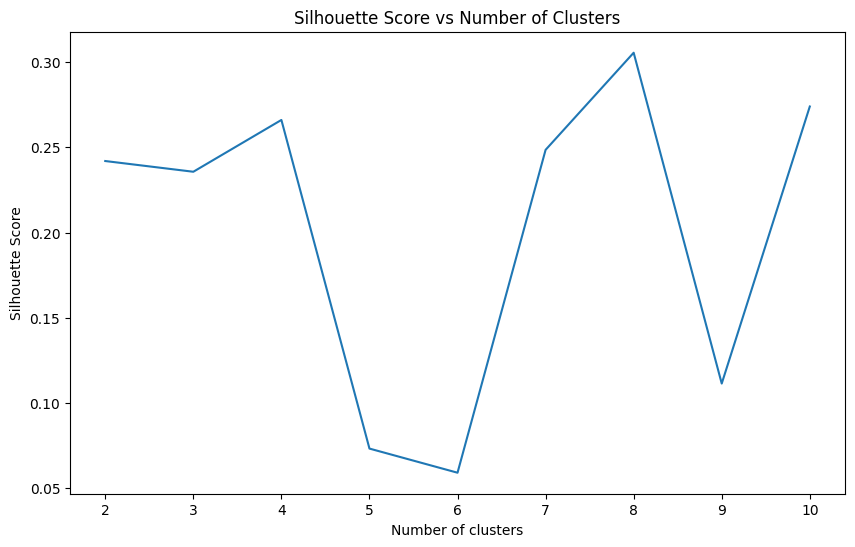


Optimal number of clusters: 8

Performing Self-Organizing Map (SOM) analysis:


Training SOM: 100%|██████████| 10000/10000 [00:05<00:00, 1867.82it/s]


Calculating SOM node positions...


Processing data points: 100%|██████████| 268224/268224 [00:55<00:00, 4865.99it/s]



Visualizing SOM with normal vs. attack instances:


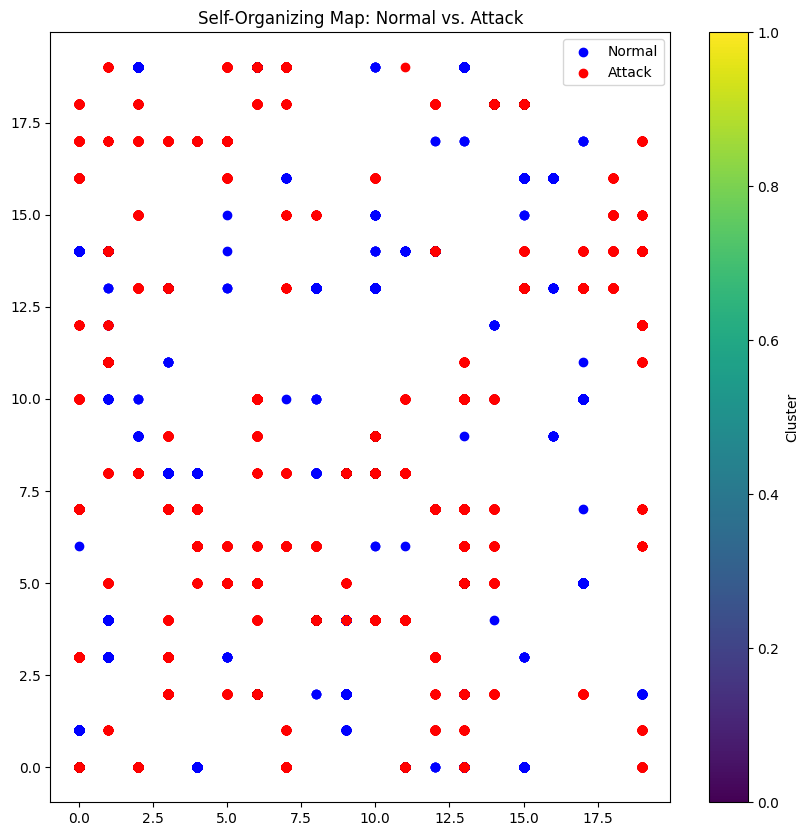

Distribution of normal vs. attack instances visualized on SOM.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
!pip install minisom tqdm
from minisom import MiniSom
import pandas as pd

# X_train_resampled_scaled, y_train_resampled, and df are available from previous steps

# Apply K-Means clustering
print("Performing K-Means Clustering:")
max_clusters = 10
silhouette_scores = []
for n_clusters in tqdm(range(2, max_clusters + 1), desc="Calculating silhouette scores"):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_resampled_scaled)
    silhouette_avg = silhouette_score(X_train_resampled_scaled, cluster_labels, sample_size=10000)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nOptimal number of clusters: {optimal_clusters}")

# Perform final K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_train_resampled_scaled)

# Apply SOM
print("\nPerforming Self-Organizing Map (SOM) analysis:")
som_dim = (20, 20)  # Larger SOM grid for larger dataset
input_dim = X_train_resampled_scaled.shape[1]  # Number of features

# Initialize and train SOM
som = MiniSom(som_dim[0], som_dim[1], input_dim, sigma=0.3, learning_rate=0.5)

# Train SOM with progress updates
num_iterations = 10000  # Increased iterations for better convergence
for i in tqdm(range(num_iterations), desc="Training SOM"):
    som.train_random(X_train_resampled_scaled, 1)  # Train one sample at a time

# Get SOM node positions for each data point
print("Calculating SOM node positions...")
som_nodes = np.array([som.winner(x) for x in tqdm(X_train_resampled_scaled, desc="Processing data points")])

# Visualize SOM with normal vs. attack instances
print("\nVisualizing SOM with normal vs. attack instances:")
labels = y_train_resampled.values
normal_indices = np.where(labels == 'Normal')[0]
attack_indices = np.where(labels == 'Attack')[0]

plt.figure(figsize=(10, 10))
plt.title('Self-Organizing Map: Normal vs. Attack')
plt.scatter(som_nodes[normal_indices, 0], som_nodes[normal_indices, 1], color='blue', label='Normal')
plt.scatter(som_nodes[attack_indices, 0], som_nodes[attack_indices, 1], color='red', label='Attack')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

print("Distribution of normal vs. attack instances visualized on SOM.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preprocessing text features using TF-IDF:

Applying LDA:

Combining LDA features with numeric features:

Performing K-Means Clustering:


Calculating silhouette scores:  12%|█▎        | 1/8 [00:03<00:23,  3.37s/it]

For n_clusters = 3, the average silhouette score is : 0.997576127060617


Calculating silhouette scores:  25%|██▌       | 2/8 [00:06<00:20,  3.39s/it]

For n_clusters = 4, the average silhouette score is : 0.6681561316945809


Calculating silhouette scores:  38%|███▊      | 3/8 [00:10<00:17,  3.55s/it]

For n_clusters = 5, the average silhouette score is : 0.7062843253975785


Calculating silhouette scores:  50%|█████     | 4/8 [00:16<00:17,  4.34s/it]

For n_clusters = 6, the average silhouette score is : 0.7097605534569119


Calculating silhouette scores:  62%|██████▎   | 5/8 [00:20<00:12,  4.22s/it]

For n_clusters = 7, the average silhouette score is : 0.7145915876837916


Calculating silhouette scores:  75%|███████▌  | 6/8 [00:24<00:08,  4.26s/it]

For n_clusters = 8, the average silhouette score is : 0.7169325605955023


Calculating silhouette scores:  88%|████████▊ | 7/8 [00:31<00:05,  5.21s/it]

For n_clusters = 9, the average silhouette score is : 0.5906756848799886


Calculating silhouette scores: 100%|██████████| 8/8 [00:36<00:00,  4.55s/it]

For n_clusters = 10, the average silhouette score is : 0.5930134321242618


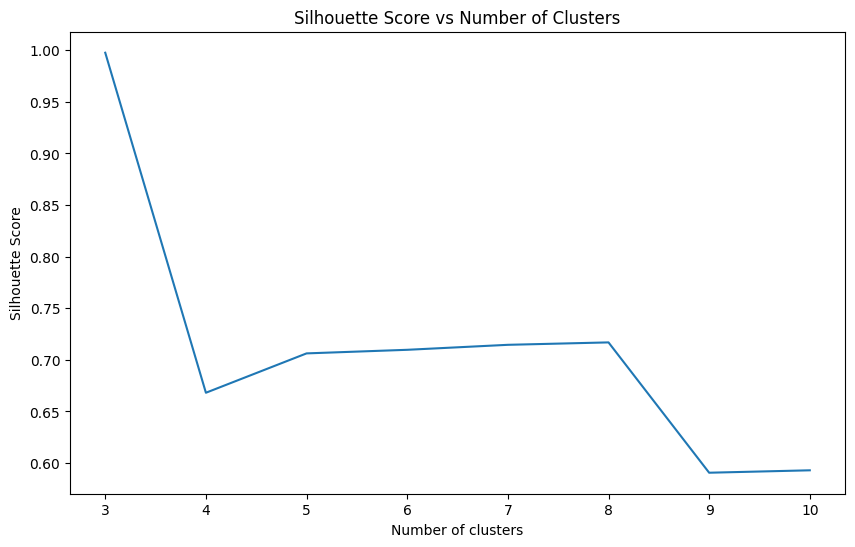


Optimal number of clusters: 3

Performing Self-Organizing Map (SOM) analysis:


Training SOM: 100%|██████████| 10000/10000 [00:02<00:00, 4879.88it/s]


Calculating SOM node positions...


Processing data points: 100%|██████████| 171380/171380 [00:09<00:00, 17896.34it/s]



Visualizing SOM with normal vs. attack instances:


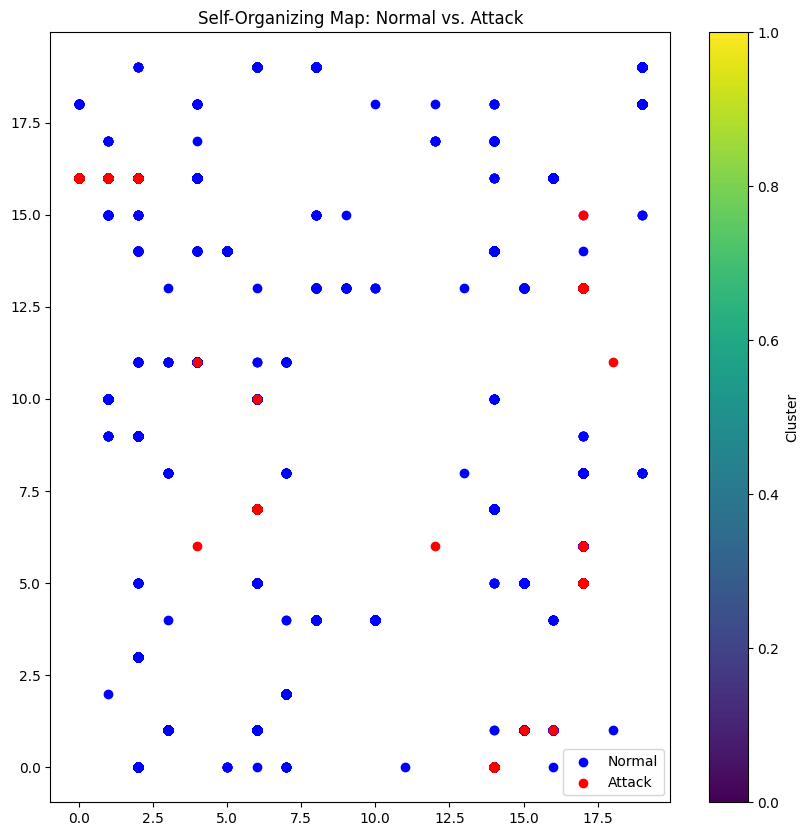

Distribution of normal vs. attack instances visualized on SOM.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from minisom import MiniSom
from tqdm import tqdm
import nltk

# Download NLTK data
nltk.download('punkt')

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/TestbedMonJun14Flows.csv'
df = pd.read_csv(file_path)

# Select relevant features
numeric_features = ['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets',
                    'totalSourcePackets', 'sourcePort', 'destinationPort']
text_features = ['sourcePayloadAsUTF', 'destinationPayloadAsUTF']

# Preprocess text features using TF-IDF
print("Preprocessing text features using TF-IDF:")
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
text_data = df[text_features].fillna('').apply(lambda x: ' '.join(x), axis=1)
tfidf_matrix = vectorizer.fit_transform(text_data)

# Apply LDA
print("\nApplying LDA:")
n_topics = 10  # Number of topics to identify
lda = LDA(n_components=n_topics, random_state=42)
lda_features = lda.fit_transform(tfidf_matrix)

# Combine LDA features with numeric features
print("\nCombining LDA features with numeric features:")
numeric_data = df[numeric_features].fillna(0)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)
combined_features = np.hstack([numeric_data_scaled, lda_features])

# Apply K-Means clustering
print("\nPerforming K-Means Clustering:")
max_clusters = 10
silhouette_scores = []

# Start the loop from 3 clusters to avoid single cluster solutions
for n_clusters in tqdm(range(3, max_clusters + 1), desc="Calculating silhouette scores"):  # Start from 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(combined_features)
    silhouette_avg = silhouette_score(combined_features, cluster_labels, sample_size=10000)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
# Adjust the x-axis range to start from 3
plt.plot(range(3, max_clusters + 1), silhouette_scores)  # Start from 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Choose the number of clusters with the highest silhouette score
# Adjust the index to account for starting from 3 clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 3  # Add 3
print(f"\nOptimal number of clusters: {optimal_clusters}")

# Perform final K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(combined_features)

# Apply SOM
print("\nPerforming Self-Organizing Map (SOM) analysis:")
som_dim = (20, 20)  # Larger SOM grid for larger dataset
input_dim = combined_features.shape[1]  # Number of features

# Initialize and train SOM
som = MiniSom(som_dim[0], som_dim[1], input_dim, sigma=0.3, learning_rate=0.5)

# Train SOM with progress updates
num_iterations = 10000  # Increased iterations for better convergence
for i in tqdm(range(num_iterations), desc="Training SOM"):
    som.train_random(combined_features, 1)  # Train one sample at a time

# Get SOM node positions for each data point
print("Calculating SOM node positions...")
som_nodes = np.array([som.winner(x) for x in tqdm(combined_features, desc="Processing data points")])

# Visualize SOM with normal vs. attack instances
print("\nVisualizing SOM with normal vs. attack instances:")
labels = df['Label'].values
normal_indices = np.where(labels == 'Normal')[0]
attack_indices = np.where(labels == 'Attack')[0]

plt.figure(figsize=(10, 10))
plt.title('Self-Organizing Map: Normal vs. Attack')
plt.scatter(som_nodes[normal_indices, 0], som_nodes[normal_indices, 1], color='blue', label='Normal')
plt.scatter(som_nodes[attack_indices, 0], som_nodes[attack_indices, 1], color='red', label='Attack')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

print("Distribution of normal vs. attack instances visualized on SOM.")


Scaled training set shape: (268224, 6)
Scaled test set shape: (34276, 6)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.041000141000959237


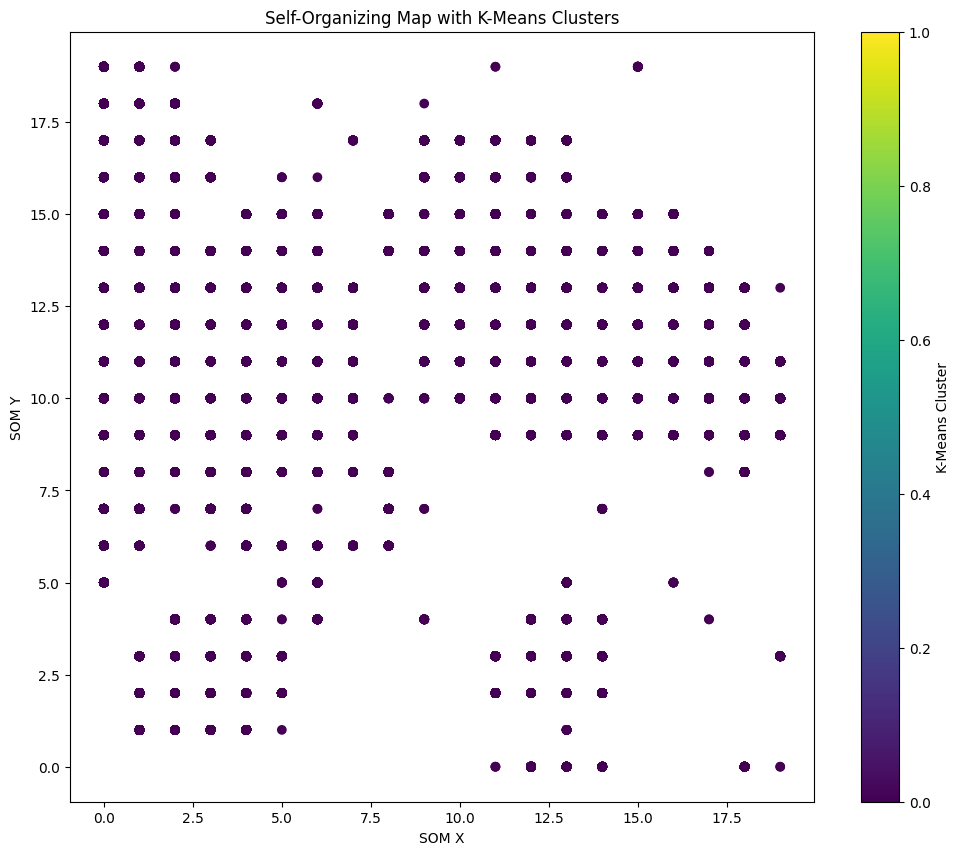


Analyzing top 5 nodes with highest attack density:
Node [13 16] has 10654 attacks


<ipython-input-31-c463932d1dfd>:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, j + 1)  # Adjust subplot layout as needed


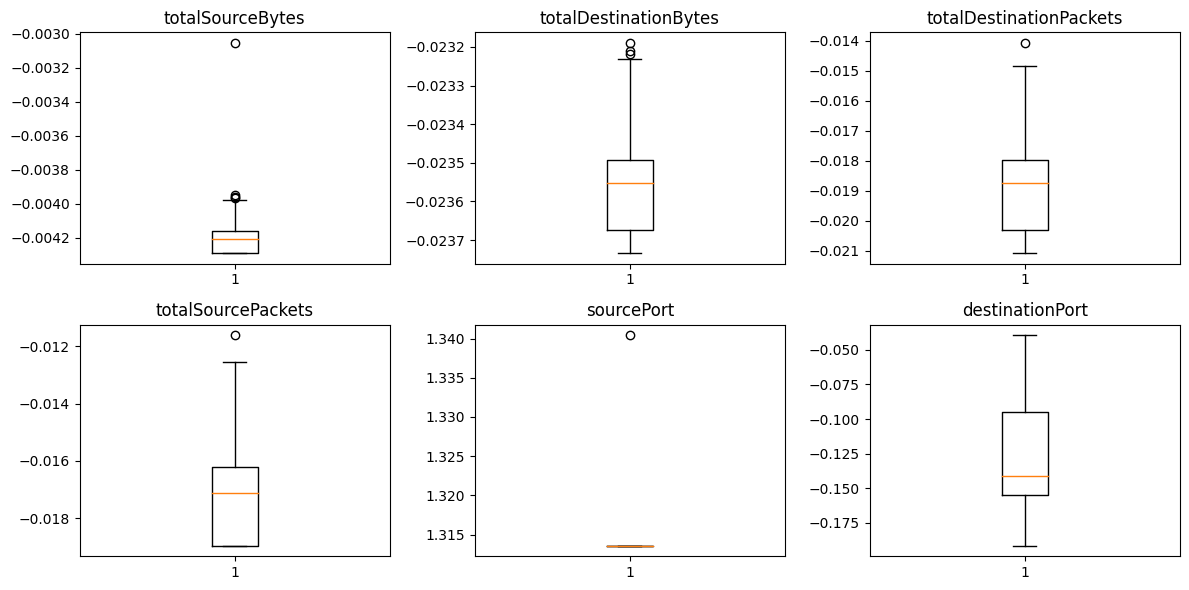

Node [13 11] has 8609 attacks


<ipython-input-31-c463932d1dfd>:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, j + 1)  # Adjust subplot layout as needed


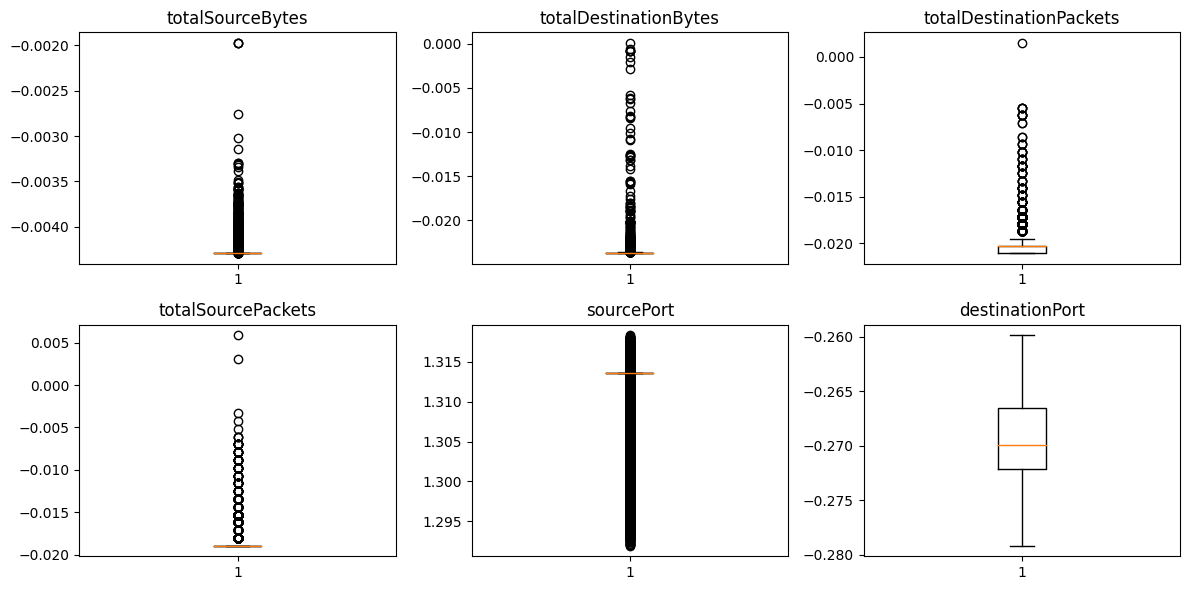

Node [11  2] has 8102 attacks


<ipython-input-31-c463932d1dfd>:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, j + 1)  # Adjust subplot layout as needed


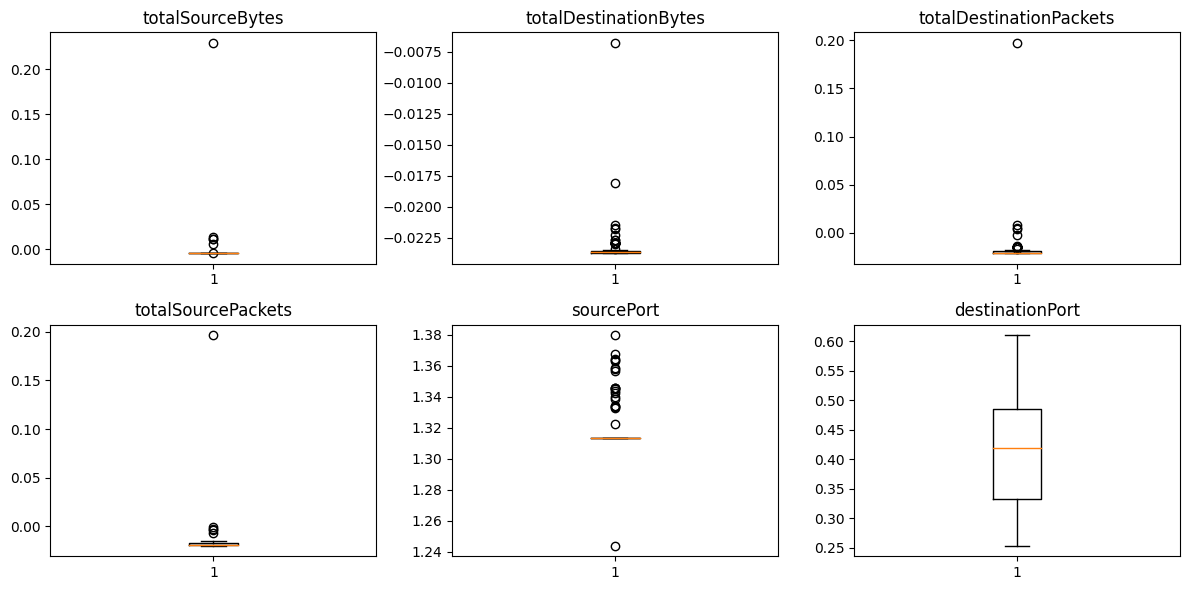

Node [3 9] has 7810 attacks


<ipython-input-31-c463932d1dfd>:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, j + 1)  # Adjust subplot layout as needed


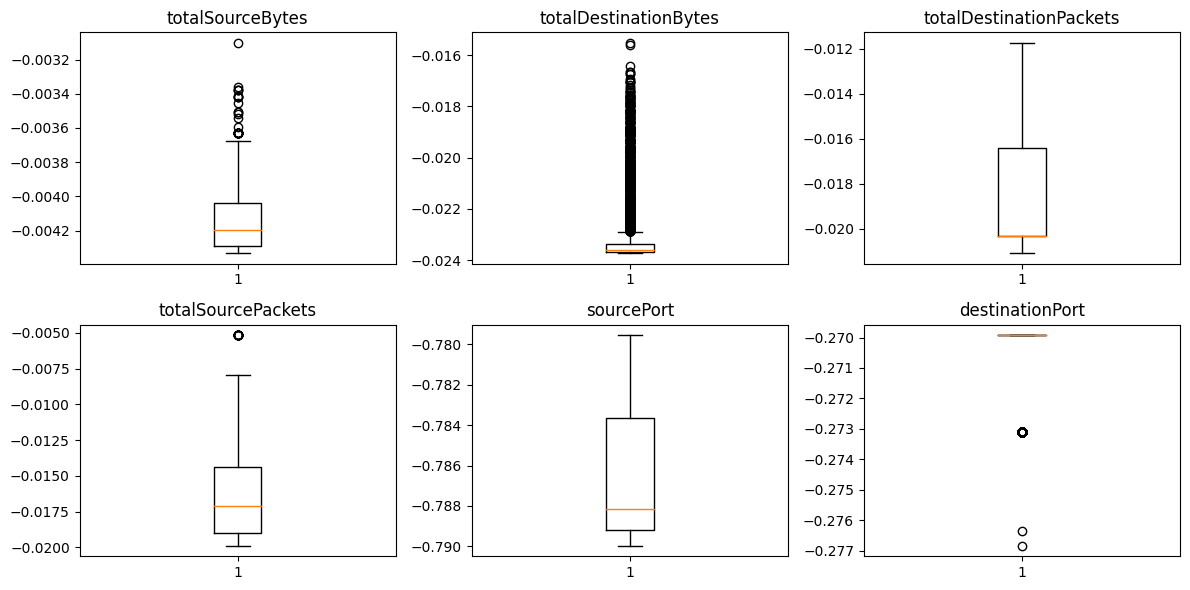

Node [12  9] has 7490 attacks


<ipython-input-31-c463932d1dfd>:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, j + 1)  # Adjust subplot layout as needed


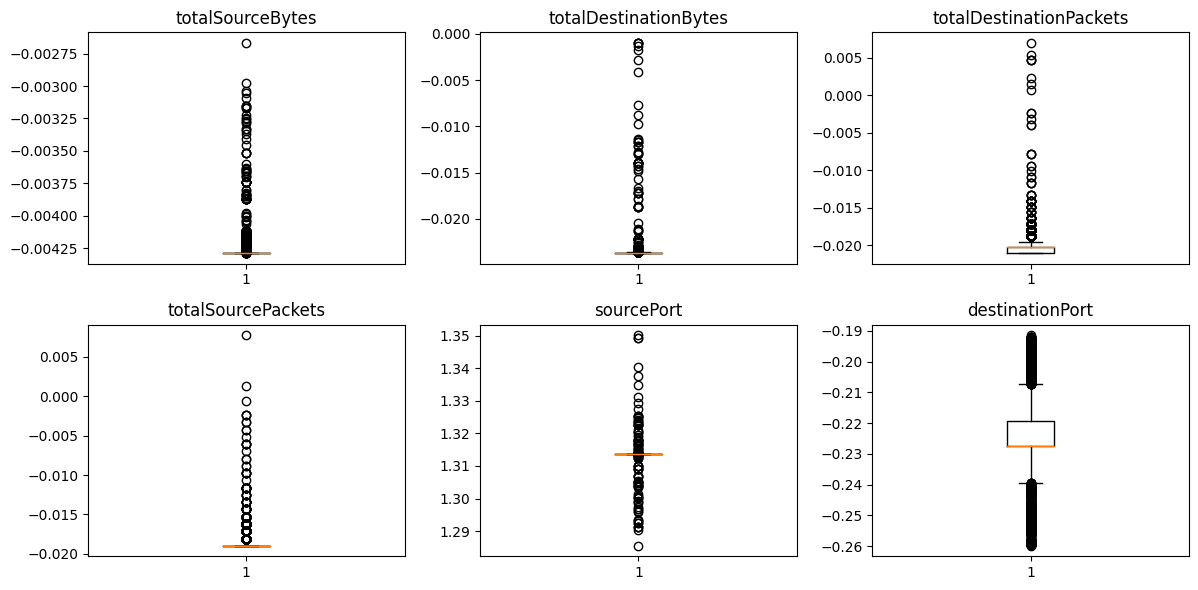

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Re-scale all features after SMOTE
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Scaled training set shape:", X_train_resampled_scaled.shape)
print("Scaled test set shape:", X_test_scaled.shape)

# Apply K-Means clustering
optimal_clusters = 8  # Our optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_resampled_scaled)

# Apply SOM
som_dim = (20, 20)  # Adjusted dimensions due to our large model size
input_dim = X_train_resampled_scaled.shape[1]
som = MiniSom(som_dim[0], som_dim[1], input_dim, sigma=1.0, learning_rate=0.5)
som.train_random(X_train_resampled_scaled, 10000, verbose=True)  # Adjusted training iterations as needed, 10000

# Get SOM node positions
som_nodes = np.array([som.winner(x) for x in X_train_resampled_scaled])

# Visualize K-Means clusters on SOM
plt.figure(figsize=(12, 10))
plt.title('Self-Organizing Map with K-Means Clusters')
scatter = plt.scatter(som_nodes[:, 0], som_nodes[:, 1], c=kmeans_labels, cmap='viridis')
plt.colorbar(scatter, label='K-Means Cluster')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.show()

# Investigate feature distribution for high attack density regions
labels = y_train_resampled.values
attack_indices = np.where(labels == 'Attack')[0]
high_attack_density_nodes = som_nodes[attack_indices]

# Count occurrences of each unique node
unique_nodes, node_counts = np.unique(high_attack_density_nodes, axis=0, return_counts=True)

# Sort nodes by count in descending order
sorted_indices = np.argsort(node_counts)[::-1]
top_n = 5  # Number of top nodes to analyze

print(f"\nAnalyzing top {top_n} nodes with highest attack density:")
for i in range(min(top_n, len(sorted_indices))):
    node = unique_nodes[sorted_indices[i]]
    count = node_counts[sorted_indices[i]]
    print(f"Node {node} has {count} attacks")

    # Find data points mapped to this node
    node_data_indices = np.where((som_nodes == node).all(axis=1))[0]
    node_data = X_train_resampled_scaled[node_data_indices]

    # Plot feature distributions for this node (boxplots)
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Distribution for SOM Node {node}')
    for j, feature in enumerate(numeric_features):
        plt.subplot(2, 3, j + 1)
        plt.boxplot(node_data[:, j])
        plt.title(feature)
    plt.tight_layout()
    plt.show()
